#  example of using SciKit Learn's Gaussian Process stuff

### Setup is the usual stuff

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess

### ground truth for this example

In [25]:
def f(x):
    return x*np.sin(np.pi*x)

In [38]:
numX = 5
lowX=-1
highX=1
thetaLow=1e-9
thetaHight=1.

### Hitting Ctrl+Enter on the following will give the same ground truth with different data. Fun.

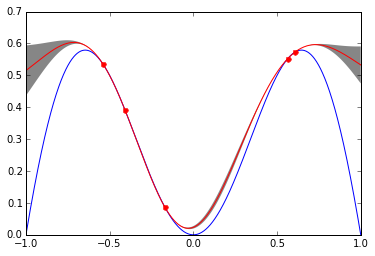

In [50]:
X = np.random.uniform(lowX, highX,size = numX )
Y = f(X)
X=np.atleast_2d(X).T

noiseVariance =1e-9

nugget=noiseVariance*np.ones(Y.size)  # ?? What's a 'nugget'? Never heard of it... (marcus)
# Oh, maybe you're able to assert different "noise" levels for every y-datapoint if desired. Fine.

gp = GaussianProcess(corr='squared_exponential',theta0=0.5,thetaL=thetaLow,thetaU=thetaHight,nugget=nugget,random_start=5)

gp.fit(X,Y)

points =np.atleast_2d(  np.linspace(lowX, highX, 1000)).T

mean, std = gp.predict(points, eval_MSE=True)


plt.plot(points,f(points), 'b-', linewidth =1)

plt.plot(points,mean, 'r-', linewidth =1)
plt.fill(np.concatenate([points, points[::-1]]),
         np.concatenate([mean - 2 * std,
                        (mean + 2* std)[::-1]]),
         alpha=.95, fc='grey', ec='None' )

plt.plot(X,Y, 'r.', markersize =10)
plt.show()